<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Multivariate Analysis
Ergänzend zu univariaten und bivariaten Analysen sollen mit Hilfe der "Multivariate Analysis" die Vermutungen bestätigt werden, dass gewisse Attribute keinen Einfluss auf das Verlassen des Unternehmens haben. 

### Initializations


In [1]:
# Bibliotheken einbinden
import itertools
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 440.3 KB


### Boxplot
Der Boxplot dient der grafischen Darstellung von Beobachtungsdaten, wie etwa das Minimum, das Maximum, der Median oder die Quantile. Mit Hilfe des Boxplots kann also ein schneller Überblick über die jeweilige Datenstruktur gewonnen werden.


In den folgenden Boxplots wird der Zusammenhang, von einem Attribut zu jeweils mehreren bestimmten Zielgrößen visualisiert.
Die zu untersuchenden Zielgrößen ergeben sich aus den vorgelagerten Untersuchungen der Daten.


- Attribute: 
    - `numberOfProjects`
    - `salary`
    - `yearsAtCompany`
    - `department`
    
    
- Zielgrößen: 
    - `averageMonthlyHours`
    - `yearsSinceEvaluation`
    - `satisfactionLevel`

In [4]:
# Setup Boxplot
def boxplot_multivariat(one, many, target):
    f, a = plt.subplots(len(many), 1, figsize=(16,6*len(many)))
    a = a.ravel()
    for idx, col in enumerate(many):
        sns.boxplot(x=one, y=col, hue=target, data=df, ax=a[idx])
        a[idx].set(ylabel=col)
        a[idx].set_xlabel(one, weight='bold')

#### Number of Projects vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


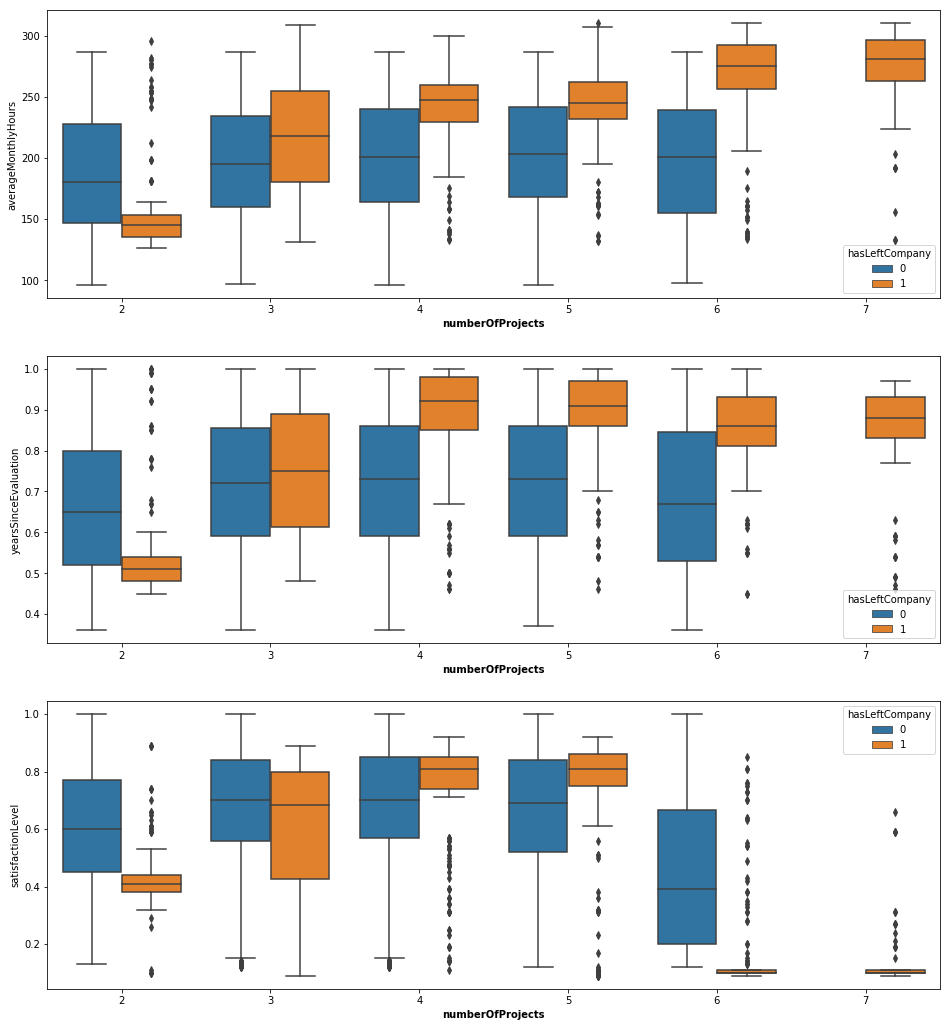

In [5]:
# Definition des Attributes und der Zielgrößen 
boxplot_multivariat('numberOfProjects', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

#### Salary vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


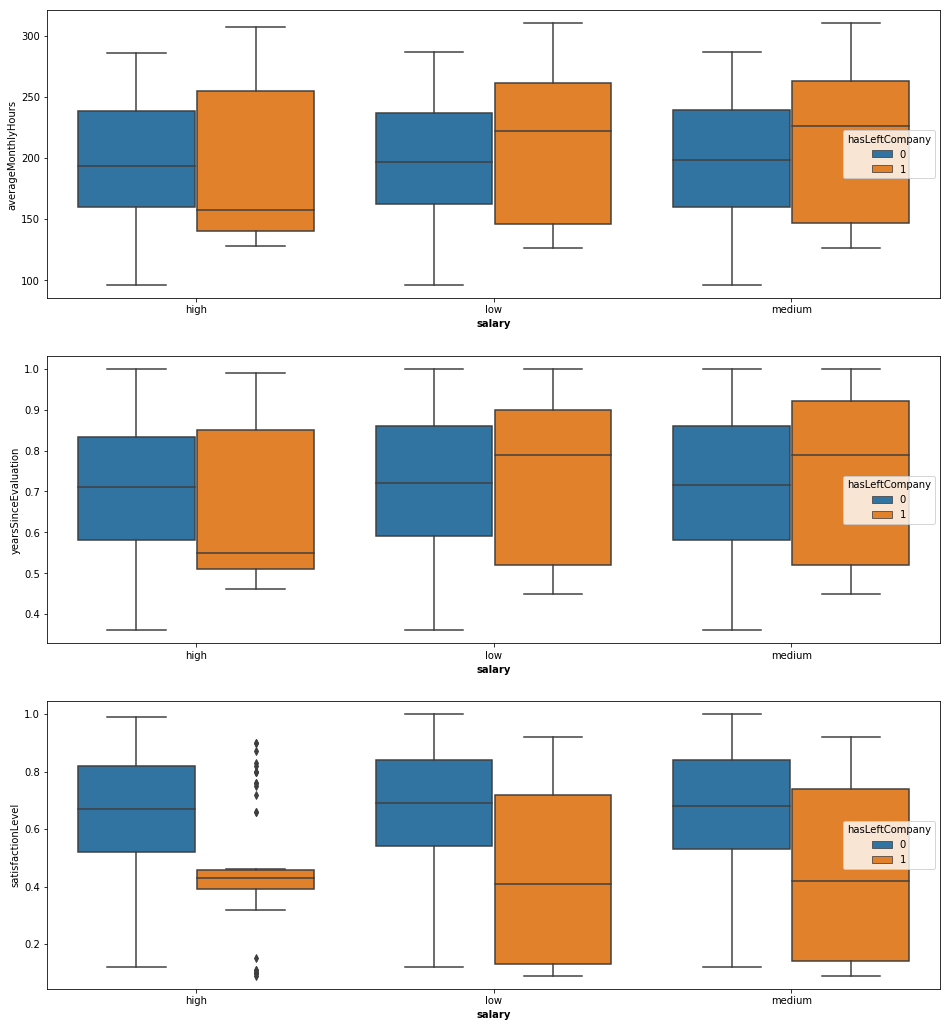

In [6]:
# Definition des Attributes und der Zielgrößen 
boxplot_multivariat('salary', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

#### Years at Company vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


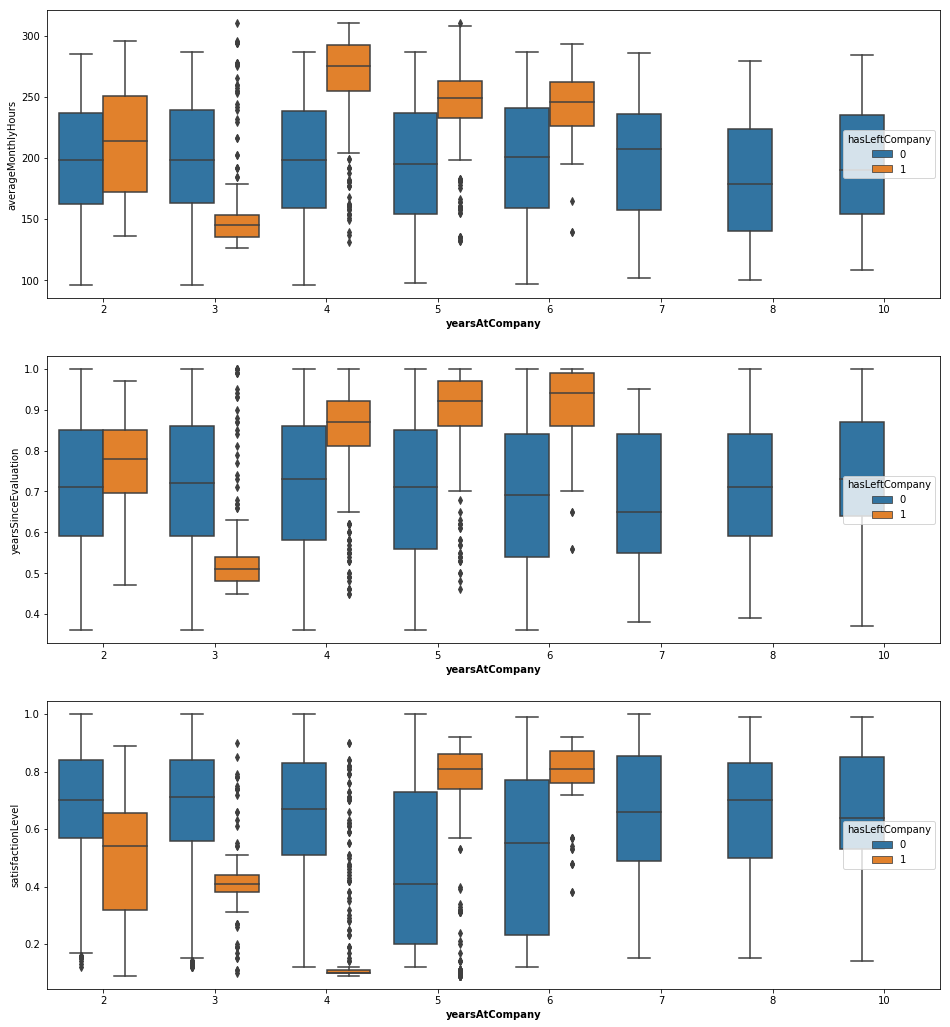

In [7]:
# Definition des Attributes und der Zielgrößen 
boxplot_multivariat('yearsAtCompany', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

#### Department vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


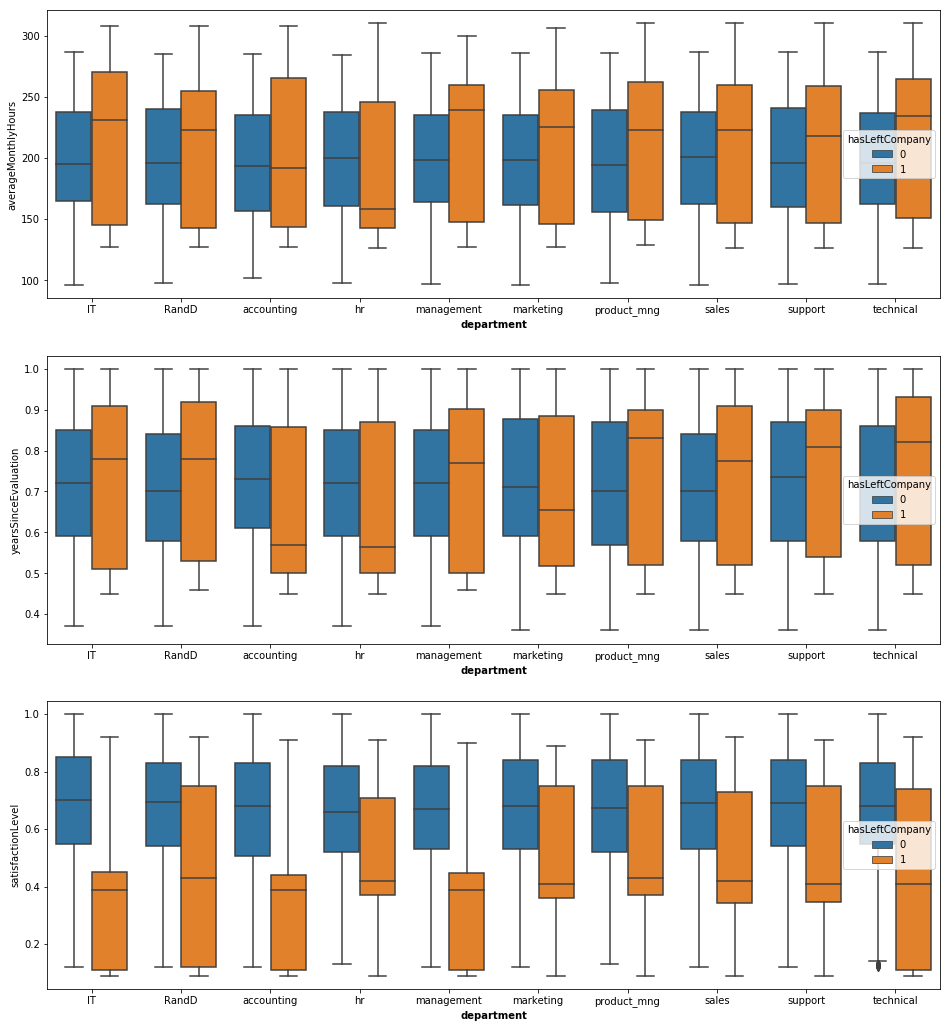

In [8]:
# Definition des Attributes und der Zielgrößen 
boxplot_multivariat('department', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

#### Fazit Boxplots
Im Fazit werden die Attribute ermittelt, die in den folgenden Schritten nicht mehr als relevant betrachtet werden, um die Fragestellung zu beantworten.

Attribute:

- **`numberOfProjects`**
    - `averageMonthlyHours`: Mitarbeiter mit einem Median über ca. 240 Stunden im Monat verlassen das Unternehmen, wenn Sie mehr als drei Projekte absolviert haben.
    - `yearsSinceEvaluation`: Wenn der Median größer gleich ca. 0,85 ist und mehr als drei Projekte absolviert wurden, verlassen die Mitarbeiter das Unternehmen.
    - `satisfactionLevel`: Trotz eines relativ hohen Medians (größer ca. 0,7) verlassen Mitarbeiter das Unternehmen bei mehr als drei Projekten.

    
- **`salary`**
    - `averageMonthlyHours`:  Obwohl Mitarbeiter ein hohes Gehalt erhalten, verlassen sie bei geringen Stunden im Monat trotzdem das Unternehmen.
    - `yearsSinceEvaluation`: Trotz eines hohen Gehaltes und einer erst kürzlich erfolgten Evaluation verlassen MA das Unternehmen.
    - `satisfactionLevel`: Mitarbeiter mit einem Median unter 0,5 neigen dazu, das Unternehmen zu verlassen.
    - -> Diese Erkenntnisse lassen den Rückschluss zu, dass das Attribut **`salary` nicht Ausschlag gebend** für den Verbleib im Unternehmen ist.


- **`yearsAtCompany`**
    - `averageMonthlyHours`:  Mitarbeiter mit einer Unternehmenszugehörigkeit zwischen **zwei** und **sieben** Jahren und das Unternehmen **nicht** verlassen haben, arbeiten ca. 200 bis 220 Stunden im Monat. Mitarbeiter, die im dritten Jahr eine geringe Stundenanzahl im Monat haben, verlassen das Unternehmen. Dafür kann die Vermutung abgeleitet werden, dass die Mitarbeiter nicht in die Projekte reinkommen und daher gehen. Mitarbeiter mit einem Median größer als 250 Stunden pro Monat und ab vier Jahren Zugehörigkeit, verlassen ebenfalls das Unternehmen. Hier kann vermutet werden, dass es sich um **burnoutgefährdete** MA handelt.
    - `yearsSinceEvaluation`: Mitarbeiter mit einem Median über ca. 0,85 verlassen das Unternehmen ab dem vierten Jahr.
    - `satisfactionLevel`: Trotz eines hohen Medians verlassen MA im fünften und sechsten Jahr das Unternehmen. Dieses Ergebnis lässt die Vermutung zu, dass die MA eine neue Herausforderung suchen.



- **`department`**
    - `averageMonthlyHours`:  Es kann keine Erkenntnis gewonnen werden.
    - `yearsSinceEvaluation`: Es kann keine Erkenntnis gewonnen werden.
    - `satisfactionLevel`: MA mit einem Median unter 0,5 neigen dazu, das Unternehmen zu verlassen.
    - -> Diese Erkenntnisse lassen den Rückschluss zu, dass das Attribut **`department` nicht Ausschlag gebend** für den Verbleib im Unternehmen ist.

### LMPlot
Basierend auf dem Korrelationstest werden folgende 2er-Kombinationen der Attribute ** `satisfactionLevel`, `yearsSinceEvaluation` und `averageMonthlyHours`** mit der Zielgröße **`hasLeftCompany`** visualisiert.

In [9]:
# Setup LMPlot
def lmplot_combinations(attributes, target):
    c = list(itertools.combinations(attributes, 2))
    for idx, col in enumerate(c):
        sns.lmplot(x=col[0], y=col[1], hue=target, fit_reg=False, data=df)

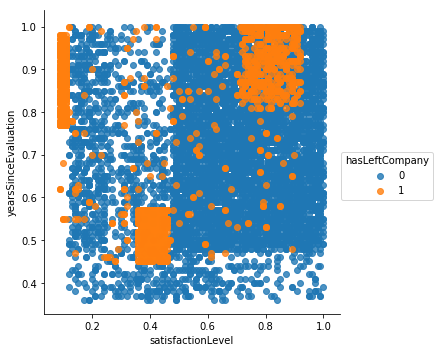

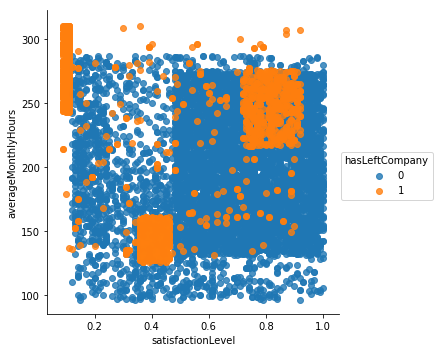

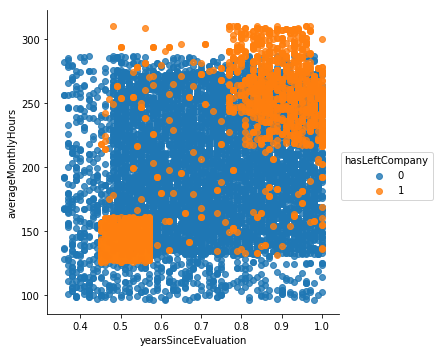

In [10]:
# Number Attributes with many distinct Values
lmplot_combinations(['satisfactionLevel', 'yearsSinceEvaluation', 'averageMonthlyHours'], 'hasLeftCompany')

#### Fazit LMPlot

- **`satisfactionLevel` & `yearsSinceEvaluation`**: Ursachen für das Verlassen des Unternehmens ergeben sich aus folgenden Paarungen: 
    - Geringe Zufriedenheit und eine Evaluation zwischen ca. 0,45 bis 0,55
    - Hohe Zufriedenheit und eine Evaluation >0,7
    - Geringe Zufriedenheit und eine Evaluation >0,75


- **`satisfactionLevel` & `averageMonthlyHours`**: Ursachen für das Verlassen des Unternehmens ergeben sich aus folgenden Paarungen: 
    - Geringe Zufriedenheit und geringe Monatsstunden. -> unterfordert und nicht auf den Projekten gefragt
    - Hohe Zufriedenheit und ca. 220 bis 280 Stunden im Monat
    - Geringe Zufriedenheit und über ca. 240 Stunden im Monat


- ** `yearsSinceEvaluation & averageMonthlyHours`**: Die dritte Visualisierung bzw. die Kombination der beiden Faktoren lässt die Vermutung zu, dass hauptsächlich zwei Gruppen von Mitarbeitern das Unternehmen verlassen:
    - **Gruppe 1**: Die Mitarbeiter der Gruppe 1 sind aus diversen Gründen (hierzu beinhaltet der Datensatz keine Informationen) nicht gefragt. Daher ist die Zufriedenheit gering und in dem kürzlich erfolgten Gespräch wurde ihnen mitgeteilt, dass Sie sich besser anderweitig orientieren sollen.   
    - **Gruppe 2**: Die Mitarbeiter der Gruppe 2 weisen eine hohe Stundenanzahl im Monat (ca. 220 bis über 300 h) und die letzte Evaluation ist mehr als neun Monate her. Diese Gruppe ist daher so interessant, da sie zu großen Teilen die **burnoutgefährdeten** Kandidaten mit geringer Zufriedenheit beinhaltet sowie die sehr zufriedenen Mitarbeiter. Die Ergebnisse an dieser Stelle lassen die Vermutung zu, dass die Zufriedenen eine neue Herausforderung suchen. 


**Eventuell gehören Teile der Gruppe 2 zu den  besten und erfahrensten Mitarbeiter und Mitarbeiterinnen, nach denen in der Aufgabenstellung gesucht wird.**

### Next Steps
Mit diesem Notebook werden die ersten Visualisierungen des Datensatzes abgeschlossen. Es konnte eine Reihe an Erkentnnissen gewonnen werden. Als nächstes werden die Daten vorbereitet, um sie in sklearn-Modelle einzubinden und letztendlich geeignete Modelle zu generieren. 